In [8]:
library(tidyverse)
library(dplyr)

In [9]:
# loading data
medical_cost <- read.csv("/Users/zxt/Desktop/OR Lab 26/Measles-Outbreak-and-Public-Policy-Reluctance/2026SP-stat/data/medical_cost_summary.csv")

In [10]:
# Official DSHS Public Health Region mapping (https://www.dshs.texas.gov/center-health-statistics/texas-county-numbers-public-health-regions) # nolint
tx_phr_lookup <- tribble(
~County, ~PHR, # nolint: indentation_linter.
"Anderson",4, # nolint: commas_linter, commas_linter.
"Andrews",9,
"Angelina",5,
"Aransas",11,
"Archer",2,
"Armstrong",1,
"Atascosa",8,
"Austin",6,
"Bailey",1,
"Bandera",8,
"Bastrop",7,
"Baylor",2,
"Bee",11,
"Bell",7,
"Bexar",8,
"Blanco",7,
"Borden",1,
"Bosque",7,
"Bowie",4,
"Brazoria",6,
"Brazos",7,
"Brewster",10,
"Briscoe",1,
"Brooks",11,
"Brown",2,
"Burleson",7,
"Burnet",7,
"Caldwell",7,
"Calhoun",8,
"Callahan",2,
"Cameron",11,
"Camp",4,
"Carson",1,
"Cass",4,
"Castro",1,
"Chambers",6,
"Cherokee",4,
"Childress",1,
"Clay",2,
"Cochran",1,
"Coke",9,
"Coleman",2,
"Collin",3,
"Collingsworth",1,
"Colorado",6,
"Comal",8,
"Comanche",2,
"Concho",9,
"Cooke",3,
"Coryell",7,
"Cottle",2,
"Crane",9,
"Crockett",9,
"Crosby",1,
"Culberson",10,
"Dallam",1,
"Dallas",3,
"Dawson",1,
"Deaf Smith",1,
"Delta",4,
"Denton",3,
"DeWitt",8,
"Dickens",1,
"Dimmit",8,
"Donley",1,
"Duval",11,
"Eastland",2,
"Ector",9,
"Edwards",8,
"Ellis",3,
"El Paso",10,
"Erath",3,
"Falls",7,
"Fannin",3,
"Fayette",7,
"Fisher",2,
"Floyd",1,
"Foard",2,
"Fort Bend",6,
"Franklin",4,
"Freestone",7,
"Frio",8,
"Gaines",1,
"Galveston",6,
"Garza",1,
"Gillespie",8,
"Glasscock",9,
"Goliad",8,
"Gonzales",8,
"Gray",1,
"Grayson",3,
"Gregg",4,
"Grimes",7,
"Guadalupe",8,
"Hale",1,
"Hall",1,
"Hamilton",7,
"Hansford",1,
"Hardeman",2,
"Hardin",5,
"Harris",6,
"Harrison",4,
"Hartley",1,
"Haskell",2,
"Hays",7,
"Hemphill",1,
"Henderson",4,
"Hidalgo",11,
"Hill",7,
"Hockley",1,
"Hood",3,
"Hopkins",4,
"Houston",5,
"Howard",9,
"Hudspeth",10,
"Hunt",3,
"Hutchinson",1,
"Irion",9,
"Jack",2,
"Jackson",8,
"Jasper",5,
"Jeff Davis",10,
"Jefferson",5,
"Jim Hogg",11,
"Jim Wells",11,
"Johnson",3,
"Jones",2,
"Karnes",8,
"Kaufman",3,
"Kendall",8,
"Kenedy",11,
"Kent",2,
"Kerr",8,
"Kimble",9,
"King",1,
"Kinney",8,
"Kleberg",11,
"Knox",2,
"Lamar",4,
"Lamb",1,
"Lampasas",7,
"La Salle",8,
"Lavaca",8,
"Lee",7,
"Leon",7,
"Liberty",6,
"Limestone",7,
"Lipscomb",1,
"Live Oak",11,
"Llano",7,
"Loving",9,
"Lubbock",1,
"Lynn",1,
"McCulloch",9,
"McLennan",7,
"McMullen",11,
"Madison",7,
"Marion",4,
"Martin",9,
"Mason",9,
"Matagorda",6,
"Maverick",8,
"Medina",8,
"Menard",9,
"Midland",9,
"Milam",7,
"Mills",7,
"Mitchell",2,
"Montague",2,
"Montgomery",6,
"Moore",1,
"Morris",4,
"Motley",1,
"Nacogdoches",5,
"Navarro",3,
"Newton",5,
"Nolan",2,
"Nueces",11,
"Ochiltree",1,
"Oldham",1,
"Orange",5,
"Palo Pinto",3,
"Panola",4,
"Parker",3,
"Parmer",1,
"Pecos",9,
"Polk",5,
"Potter",1,
"Presidio",10,
"Rains",4,
"Randall",1,
"Reagan",9,
"Real",8,
"Red River",4,
"Reeves",9,
"Refugio",11,
"Roberts",1,
"Robertson",7,
"Rockwall",3,
"Runnels",2,
"Rusk",4,
"Sabine",5,
"San Augustine",5,
"San Jacinto",5,
"San Patricio",11,
"San Saba",7,
"Schleicher",9,
"Scurry",2,
"Shackelford",2,
"Shelby",5,
"Sherman",1,
"Smith",4,
"Somervell",3,
"Starr",11,
"Stephens",2,
"Sterling",9,
"Stonewall",2,
"Sutton",9,
"Swisher",1,
"Tarrant",3,
"Taylor",2,
"Terrell",9,
"Terry",1,
"Throckmorton",2,
"Titus",4,
"Tom Green",9,
"Travis",7,
"Trinity",5,
"Tyler",5,
"Upshur",4,
"Upton",9,
"Uvalde",8,
"Val Verde",8,
"Van Zandt",4,
"Victoria",8,
"Walker",6,
"Waller",6,
"Ward",9,
"Washington",7,
"Webb",11,
"Wharton",6,
"Wheeler",1,
"Wichita",2,
"Wilbarger",2,
"Willacy",11,
"Williamson",7,
"Wilson",8,
"Winkler",9,
"Wise",3,
"Wood",4,
"Yoakum",1,
"Young",2,
"Zapata",11,
"Zavala",8
)

In [11]:
# create a multi-year summary of outbreak cases by PHR
library(tidyverse)
cases <- read_csv("/Users/zxt/Desktop/OR Lab 26/Measles-Outbreak-and-Public-Policy-Reluctance/2026SP-stat/data/count.csv")

cases <- cases %>%
  filter(County != "Texas")

cases_long <- cases %>%
  pivot_longer(
    cols = `2016`:`2025`,
    names_to = "Year",
    values_to = "Cases"
  ) %>%
  mutate(Year = as.integer(Year))

cases_long <- cases_long %>%
  left_join(tx_phr_lookup, by = "County")

phr_year_outbreaks <- cases_long %>%
  group_by(PHR, Year) %>%
  summarise(
    OutbreakCases = sum(Cases, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(PHR, Year)

phr_year_outbreaks

Rows: 255 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): County
dbl (10): 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


PHR,Year,OutbreakCases
<dbl>,<int>,<dbl>
1,2016,0
1,2017,0
1,2018,0
1,2019,1
1,2020,0
1,2021,0
1,2022,0
1,2023,0
1,2024,0



Call:
lm(formula = OutbreakCases ~ Yes_pct, data = analysis_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-121.47  -70.67  -44.37  -20.36  495.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  1794.38    1914.99   0.937    0.373
Yes_pct       -21.10      23.39  -0.902    0.391

Residual standard error: 179.9 on 9 degrees of freedom
Multiple R-squared:  0.08292,	Adjusted R-squared:  -0.01897 
F-statistic: 0.8138 on 1 and 9 DF,  p-value: 0.3905


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


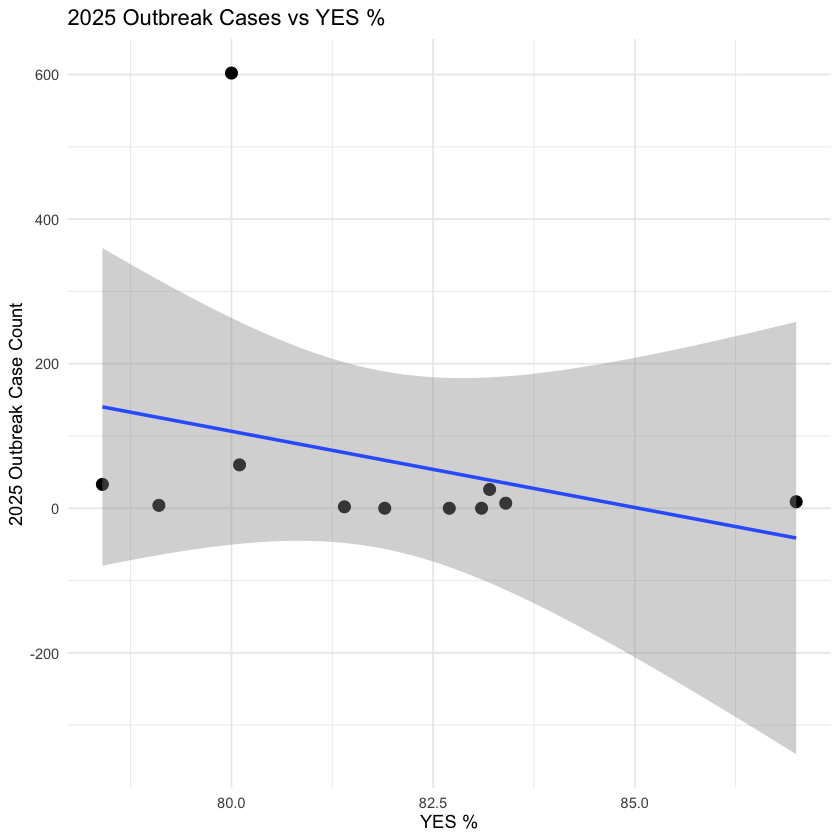


Call:
glm(formula = OutbreakCases ~ Yes_pct, family = poisson(), data = analysis_df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 37.36689    1.71465   21.79   <2e-16 ***
Yes_pct     -0.40971    0.02138  -19.16   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2417.9  on 10  degrees of freedom
Residual deviance: 1957.1  on  9  degrees of freedom
AIC: 1999.5

Number of Fisher Scoring iterations: 6


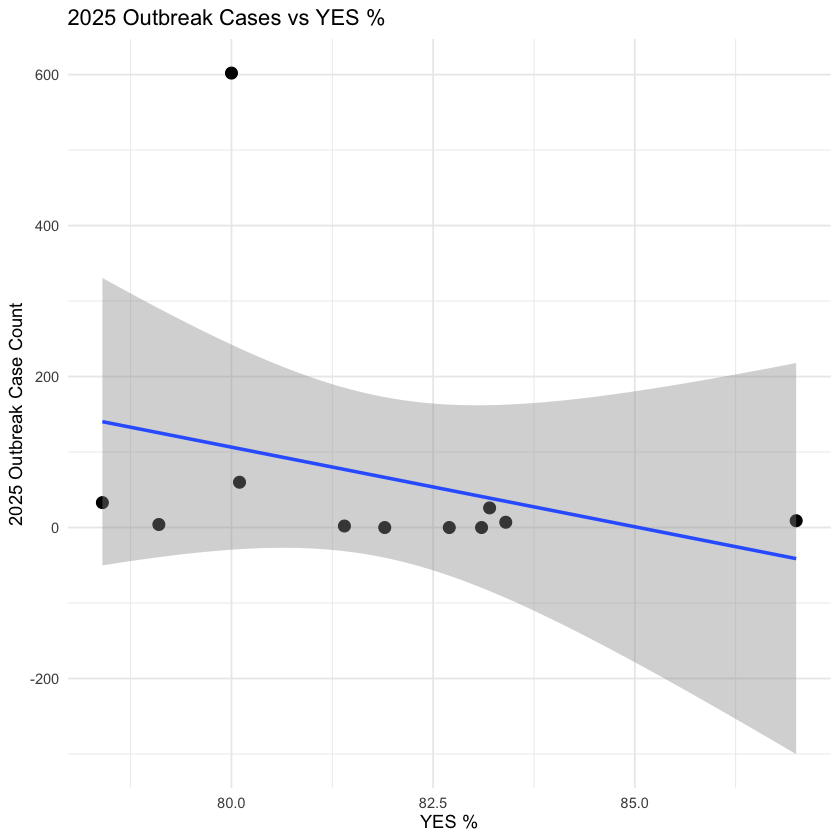

In [12]:
# Filter to 2025 outbreak totals
outbreak_2025 <- phr_year_outbreaks %>%
  filter(Year == 2025)


medical_cost_pct <- medical_cost %>%
  select(PHR, Yes_pct)

# Now merge
analysis_df <- outbreak_2025 %>%
  left_join(medical_cost_pct, by = "PHR")


# Run linear model
model <- lm(OutbreakCases ~ Yes_pct, data = analysis_df)

summary(model)

ggplot(analysis_df, aes(x = Yes_pct, y = OutbreakCases)) +
  geom_point(size = 3) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(
    title = "2025 Outbreak Cases vs YES %",
    x = "YES %",
    y = "2025 Outbreak Case Count"
  ) +
  theme_minimal()

pmodel <- glm(OutbreakCases ~ Yes_pct, family = poisson(), data = analysis_df)

ggplot(analysis_df, aes(x = Yes_pct, y = OutbreakCases)) +
  geom_point(size = 3) +
  geom_smooth(method = "glm", se = TRUE) +
  labs(
    title = "2025 Outbreak Cases vs YES %",
    x = "YES %",
    y = "2025 Outbreak Case Count"
  ) +
  theme_minimal()

summary(pmodel)


In [14]:
# Export analysis_df to CSV
write.csv(tx_phr_lookup, "/Users/zxt/Desktop/OR Lab 26/Measles-Outbreak-and-Public-Policy-Reluctance/2026SP-stat/data/brfss/analysis_results.csv", row.names = FALSE)
print("Dataframe saved to analysis_results.csv")


[1] "Dataframe saved to analysis_results.csv"
